In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('fraud_detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
data['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [5]:
data['isFraud'].values

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [6]:
data.shape

(6362620, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
data['step'].values

array([  1,   1,   1, ..., 743, 743, 743], dtype=int64)

In [10]:
data['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [11]:
data.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [12]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

    max_rows_analyzed is smaller than dataset shape 6362620...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
step,0.000000,3.800000,int64,380,0,0,
type,0.000000,0.050000,object,5,0,72,
amount,0.000000,99.920000,float64,9992,0,0,highly right skewed distribution: drop outliers or do box-cox transform
nameOrig,0.000000,100.000000,object,10000,0,1,"combine rare categories, possible ID column: drop"
oldbalanceOrg,0.000000,63.900000,float64,6390,0,0,highly right skewed distribution: drop outliers or do box-cox transform
newbalanceOrig,0.000000,43.360000,float64,4336,0,0,highly right skewed distribution: drop outliers or do box-cox transform
nameDest,0.000000,99.190000,object,9919,0,1,combine rare categories
oldbalanceDest,0.000000,57.330000,float64,5733,0,0,highly right skewed distribution: drop outliers or do box-cox transform
newbalanceDest,0.000000,61.310000,float64,6131,0,0,highly right skewed distribution: drop outliers or do box-cox transform
isFraud,0.000000,0.020000,int64,2,0,0,


    11 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['nameOrig', 'isFlaggedFraud']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 15


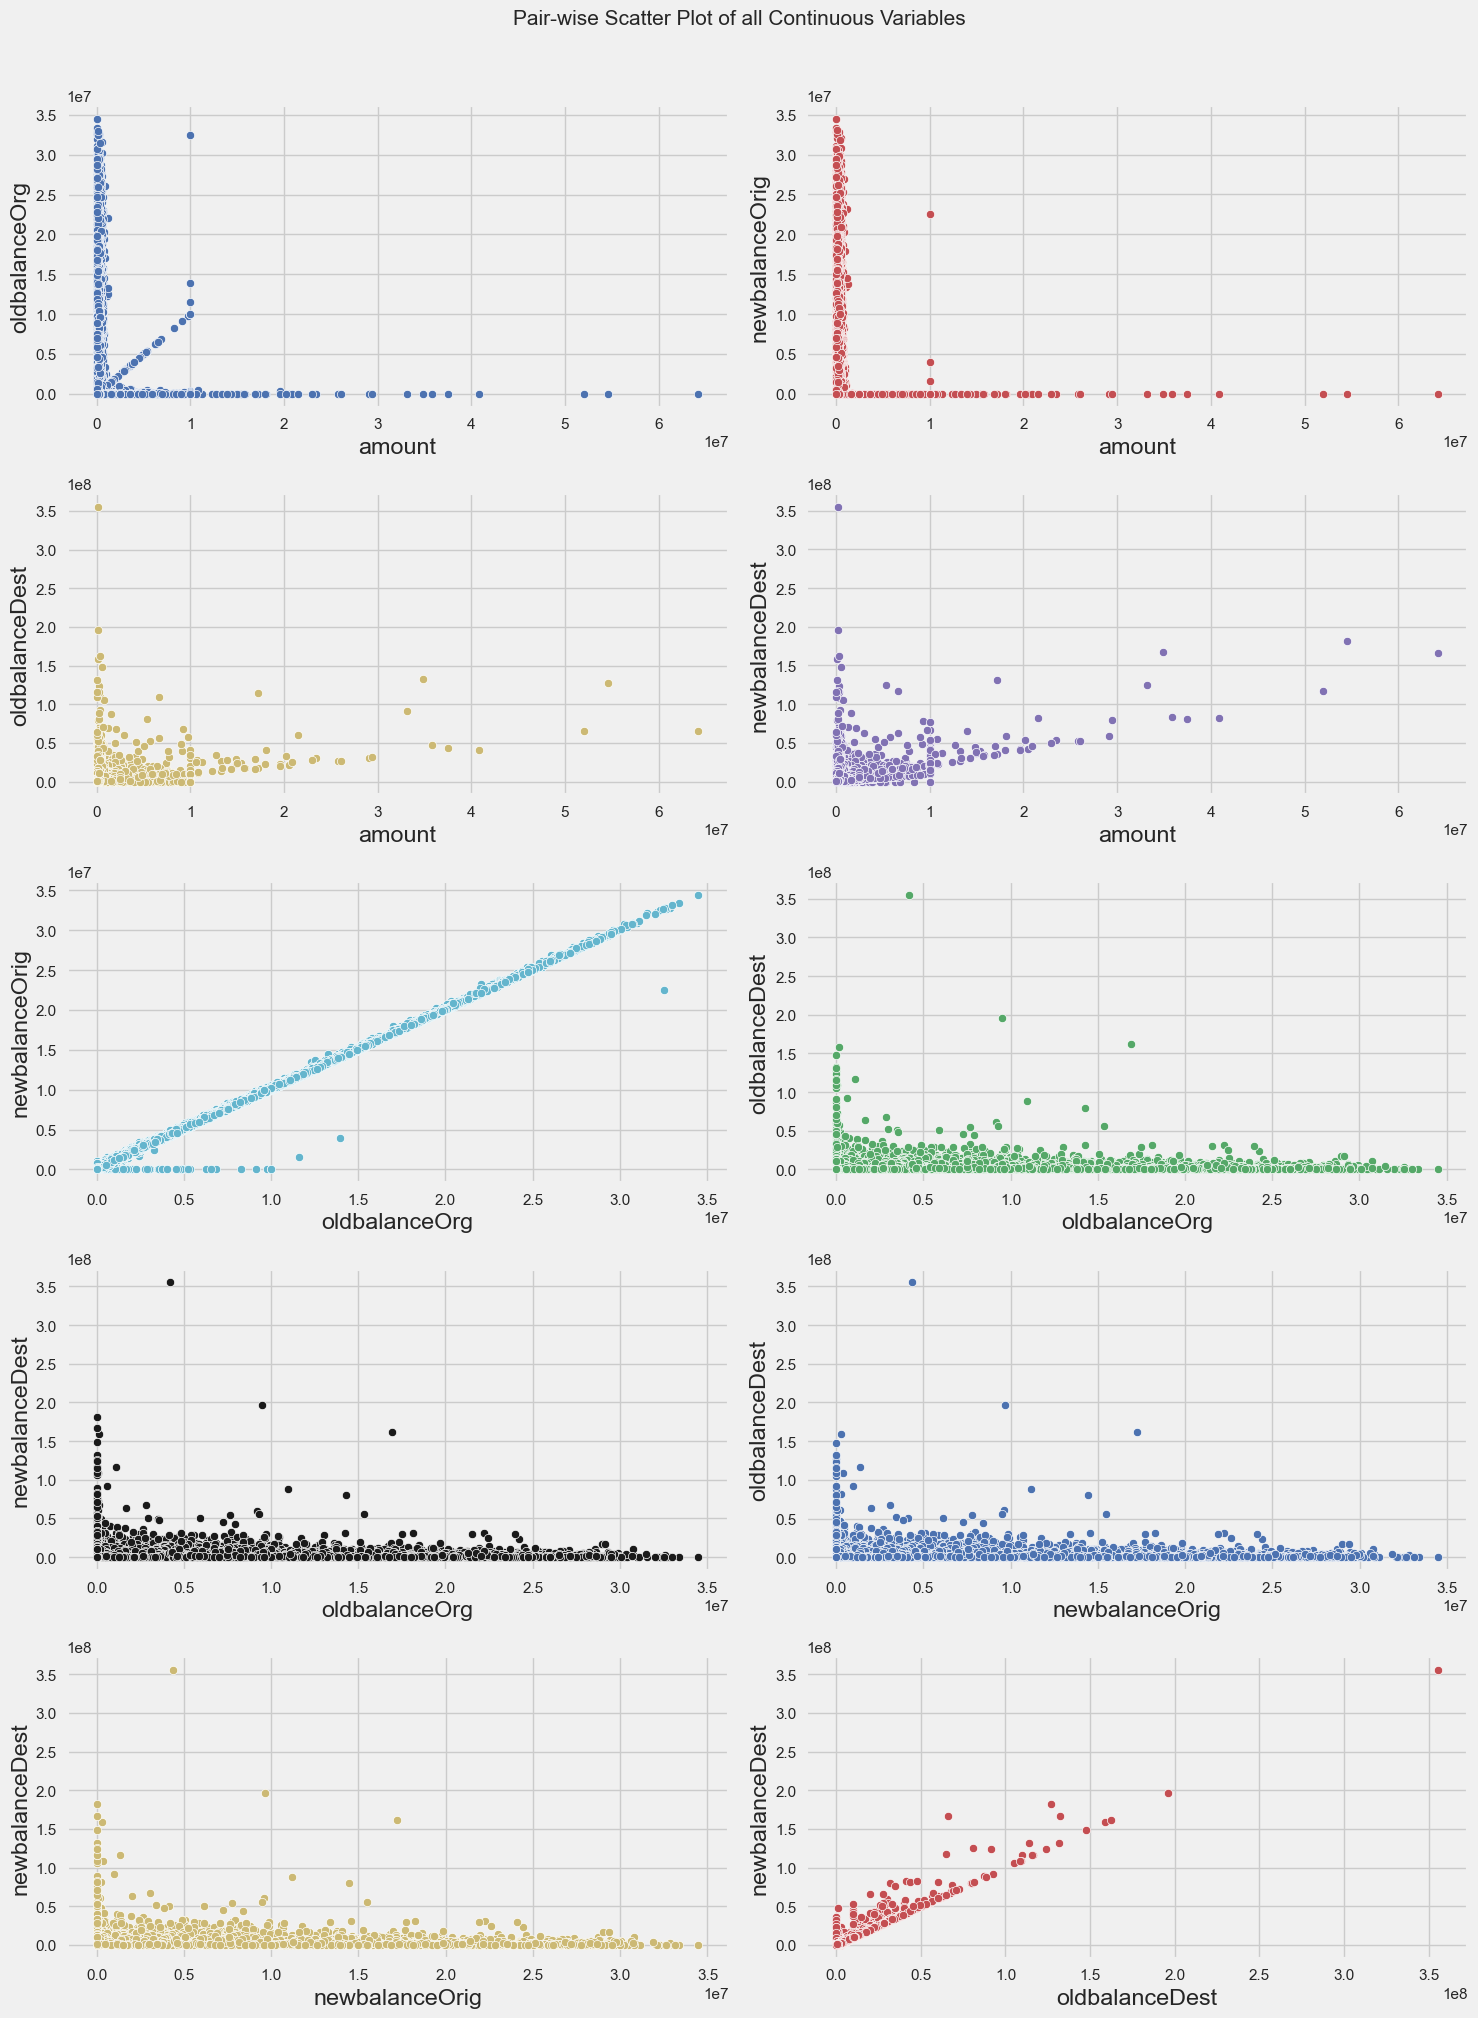

Could not draw Distribution Plot


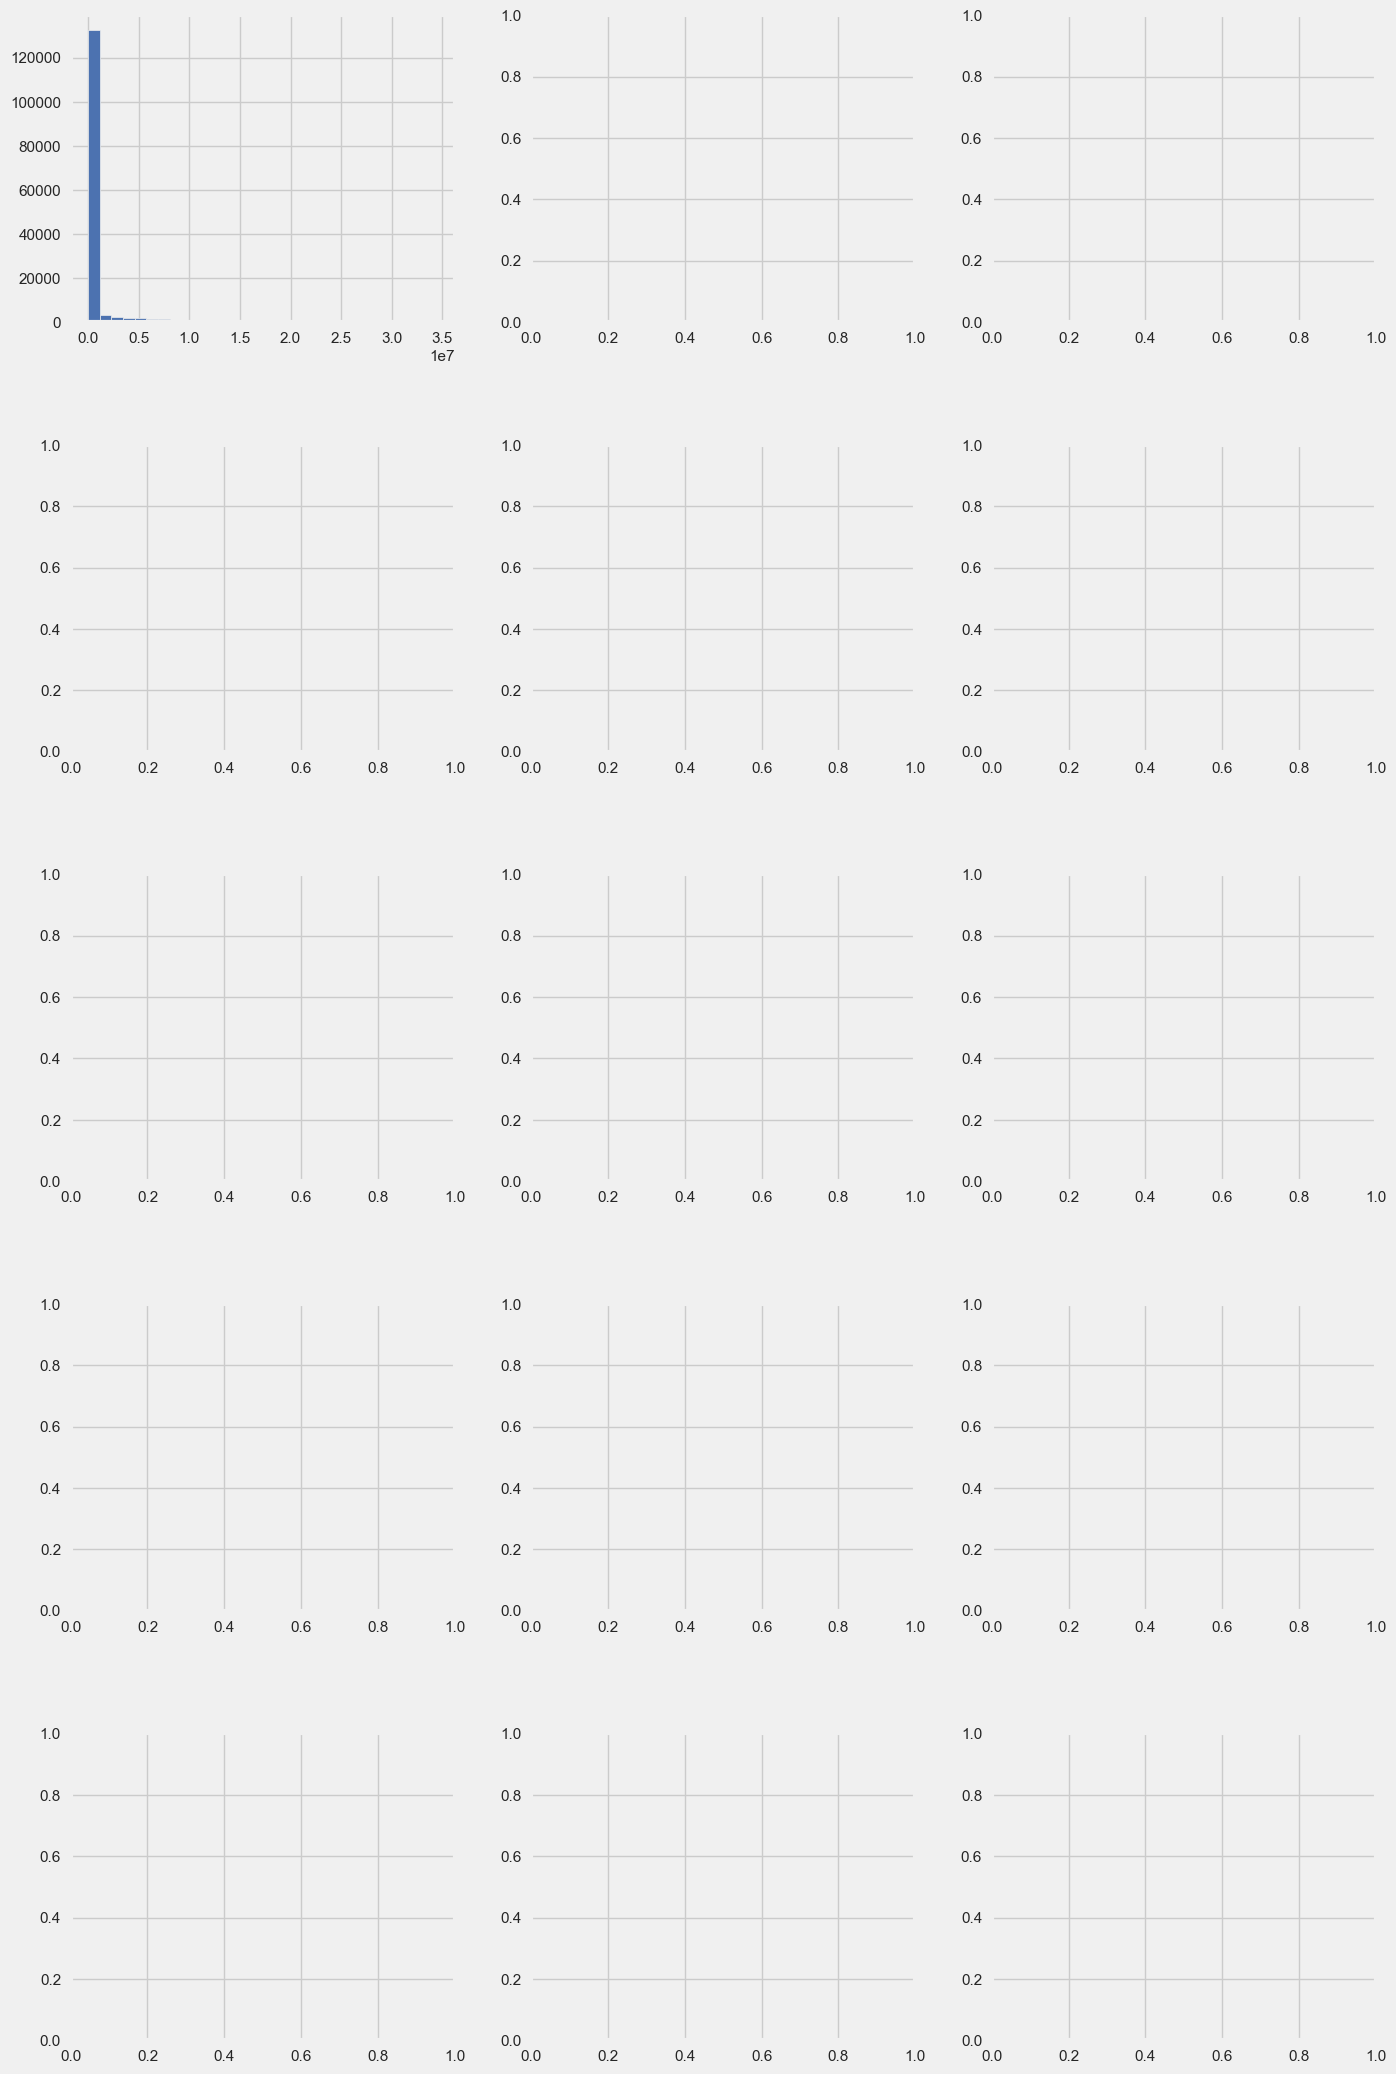

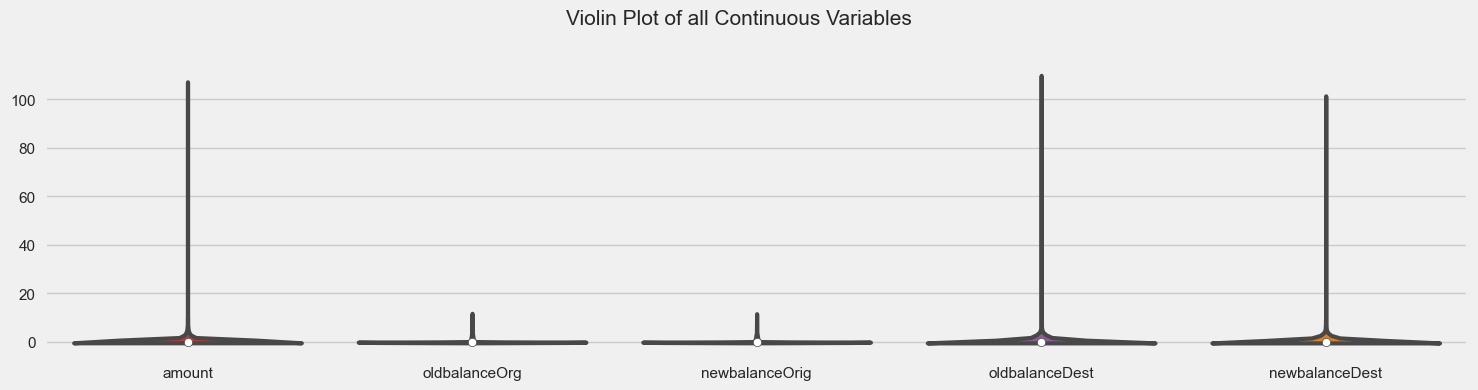

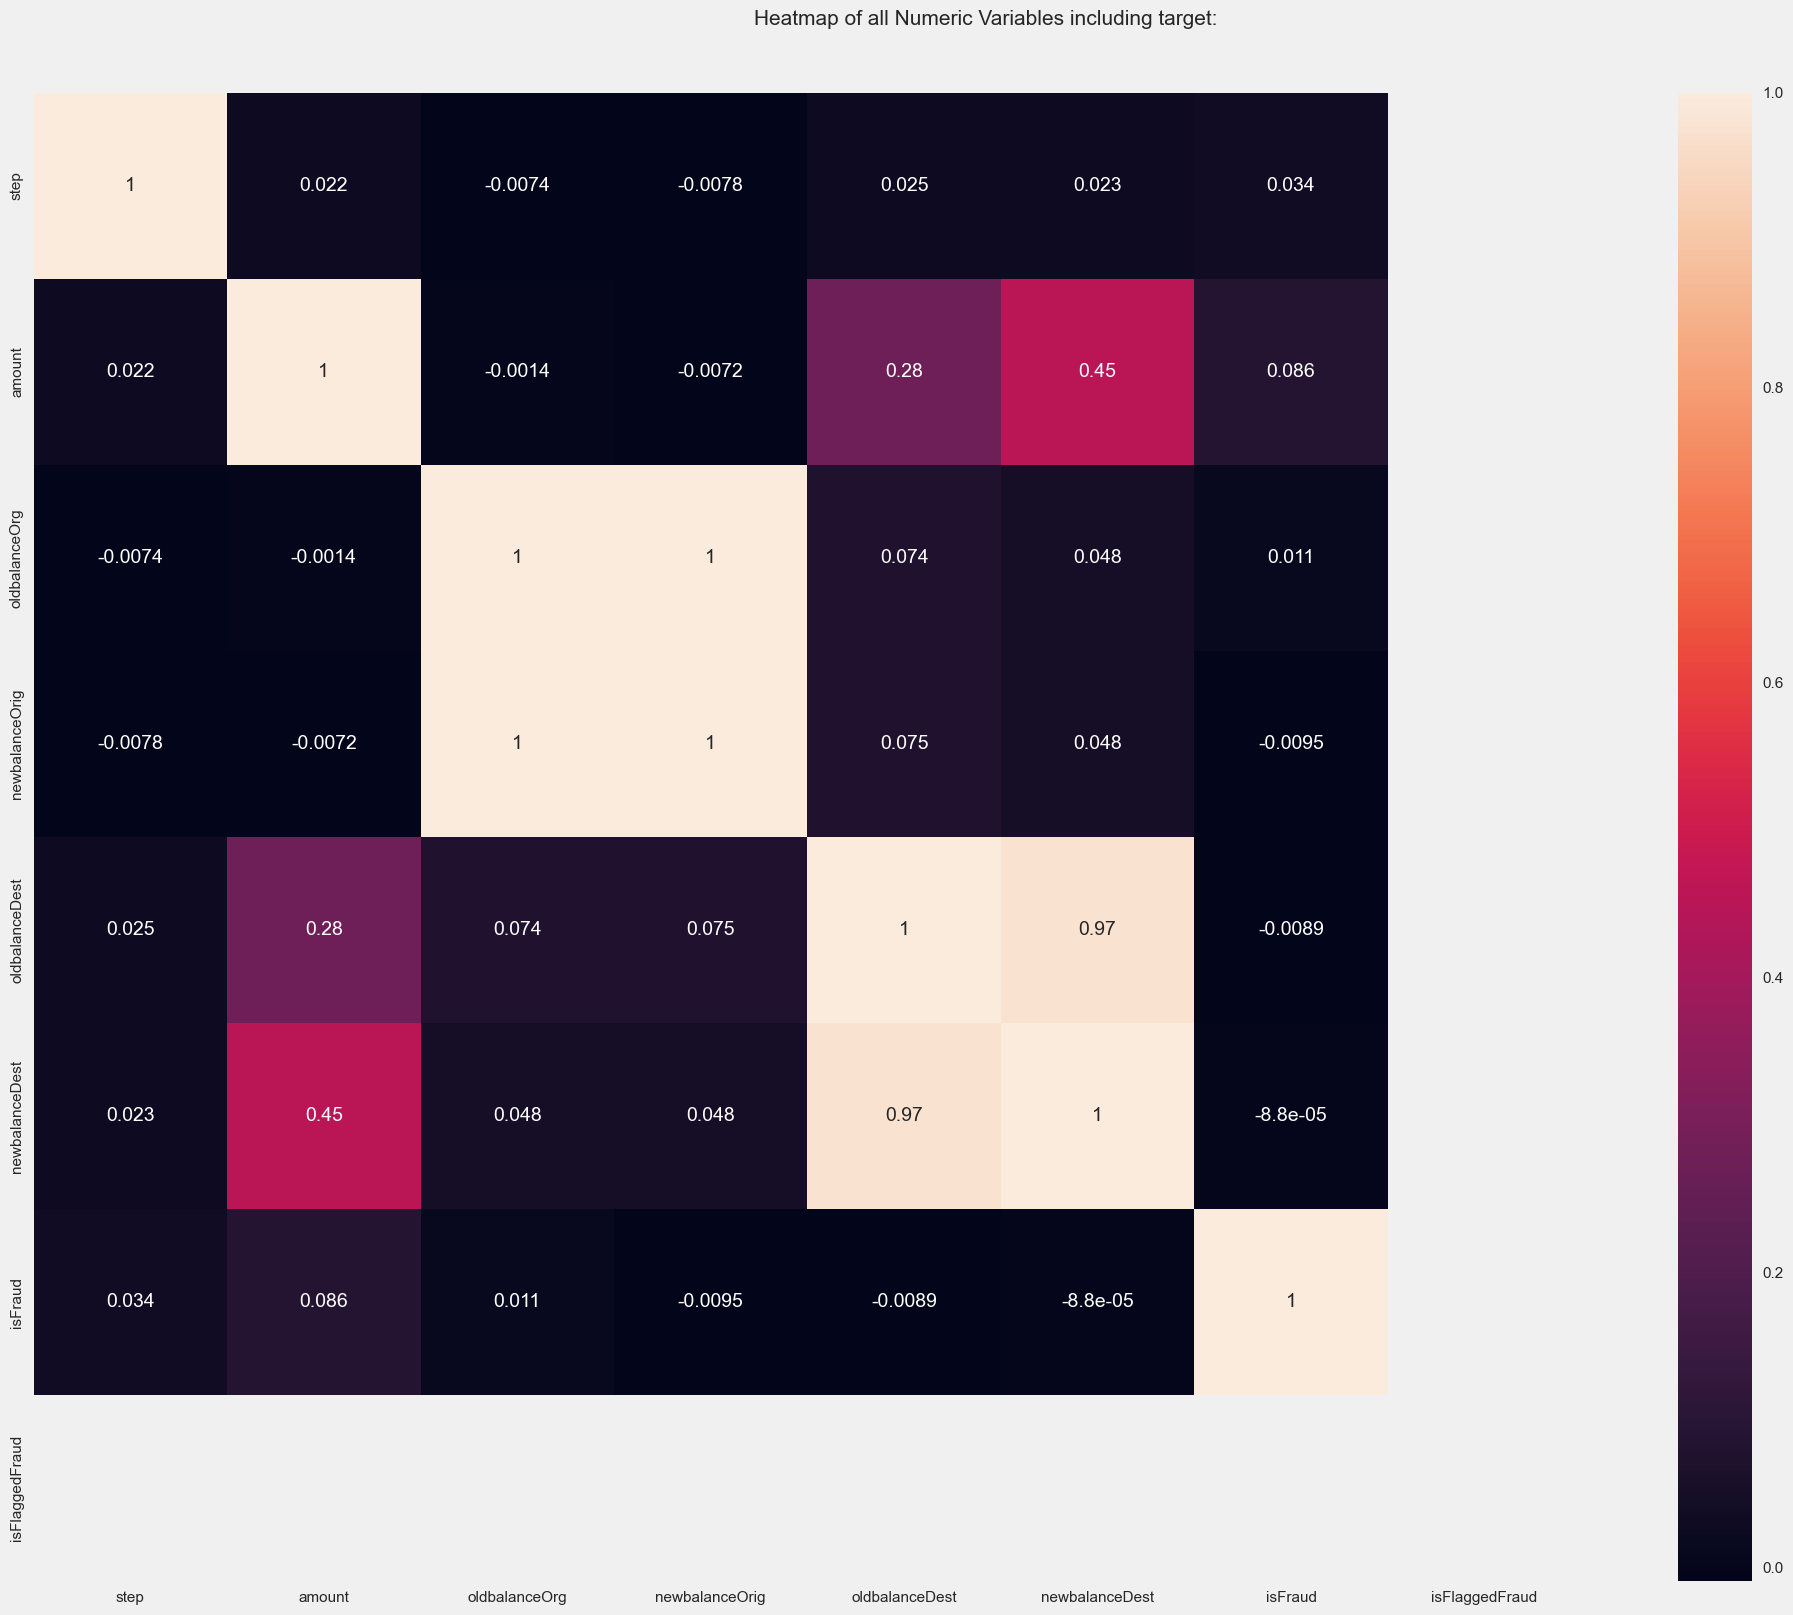

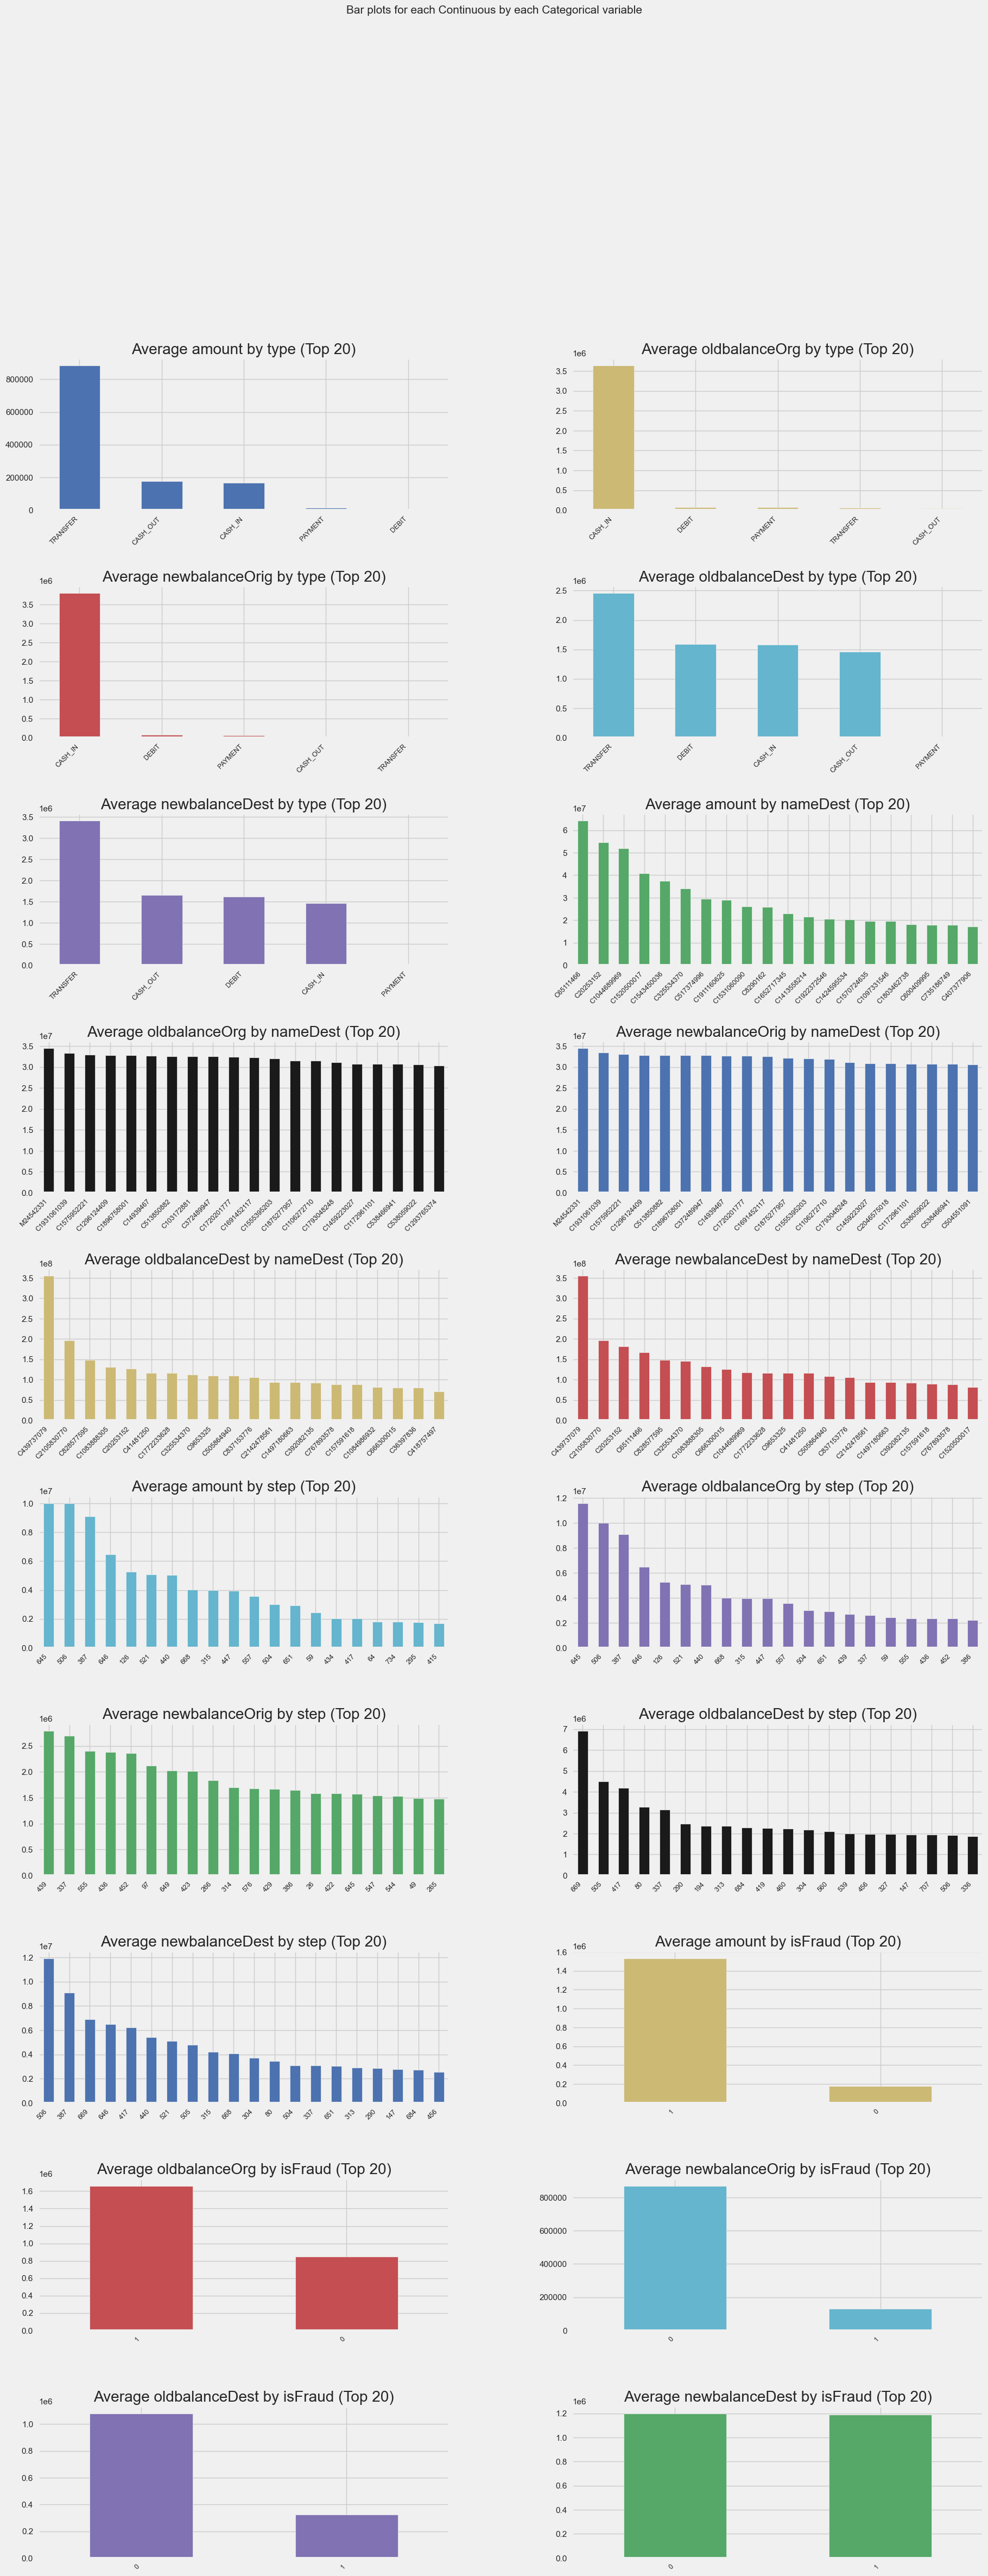

All Plots done
Time to run AutoViz = 142 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5181574,359,PAYMENT,1892.05,C1486747482,20635.00,18742.95,M1519292293,0.00,0.00,0,0
74207,10,CASH_OUT,35137.32,C27881940,29141.00,0.00,C49954890,0.00,485362.02,0,0
2848397,227,CASH_OUT,143135.96,C1223282099,0.00,0.00,C1957836640,1236635.20,1379771.16,0,0
1841353,163,PAYMENT,7043.80,C1366572664,214.00,0.00,M376426276,0.00,0.00,0,0
6114230,527,CASH_IN,17808.11,C978581021,942321.40,960129.51,C2103127071,255137.95,237329.84,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1769952,162,CASH_OUT,37749.67,C1419452803,0.00,0.00,C991898709,204324.16,242073.83,0,0
450328,19,CASH_OUT,37883.61,C1428115435,543781.20,505897.59,C1218780562,1073396.71,1111280.32,0,0
1361220,138,CASH_IN,156717.17,C1683528304,3323255.02,3479972.19,C994662850,897062.80,740345.64,0,0
2599835,208,CASH_OUT,280996.06,C463596892,12134.00,0.00,C272881310,10641923.24,10922919.30,0,0


In [16]:
from autoviz.AutoViz_Class import AutoViz_Class

av=AutoViz_Class()
# Visualize Data

av.AutoViz('fraud_detection.csv')

In [4]:
data.drop(['nameOrig', 'isFlaggedFraud'],axis=1,inplace=True)

In [5]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1


In [16]:
corr=data.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<AxesSubplot:>

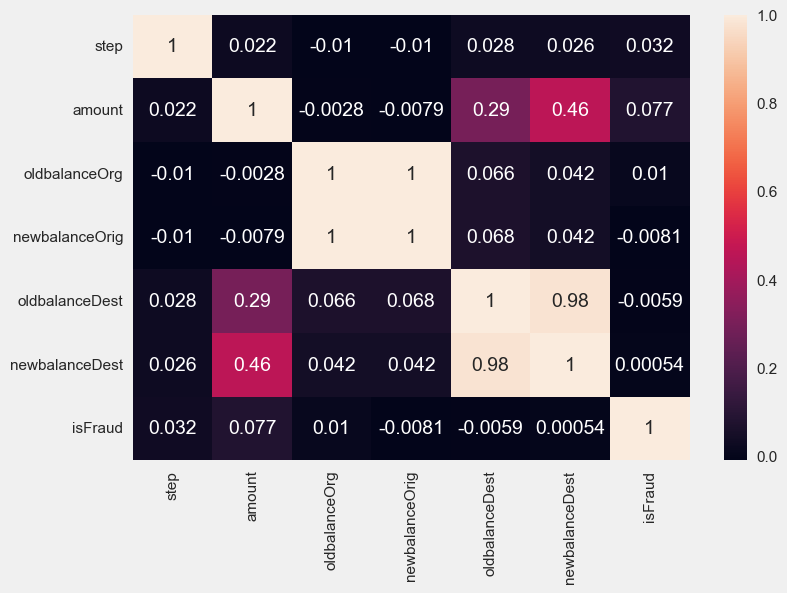

In [20]:
# sns.heatmap(corr,annot=True)

In [6]:
data.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [7]:
data.columns.value_counts()

step              1
type              1
amount            1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cat_col=data.select_dtypes(include='object').columns

data.drop('nameDest',axis=1,inplace=True)

In [7]:
data['type']=le.fit_transform(data['type'])
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


In [8]:
# Assign Dependent and Independent Variable
x=data.drop('isFraud',axis=1).values
y=data['isFraud'].values

In [9]:
# Split Data into training and testing 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5090096, 7), (1272524, 7), (5090096,), (1272524,))

In [11]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [12]:
# Build An ANN Model 
import tensorflow as tf
from tensorflow import keras

In [13]:
model=keras.Sequential([
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense((1),activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
res=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=128)

Epoch 1/3
39767/39767 [==============================] - 139s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 2/3
39767/39767 [==============================] - 139s 4ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 3/3
39767/39767 [==============================] - 142s 4ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9995


In [15]:
model.evaluate(x_test,y_test)

39767/39767 [==============================] - 99s 2ms/step - loss: 0.0022 - accuracy: 0.9995


[0.002219205256551504, 0.9995120167732239]

In [16]:
model.evaluate(x_train,y_train)

159066/159066 [==============================] - 394s 2ms/step - loss: 0.0023 - accuracy: 0.9995


[0.002289567841216922, 0.999523401260376]

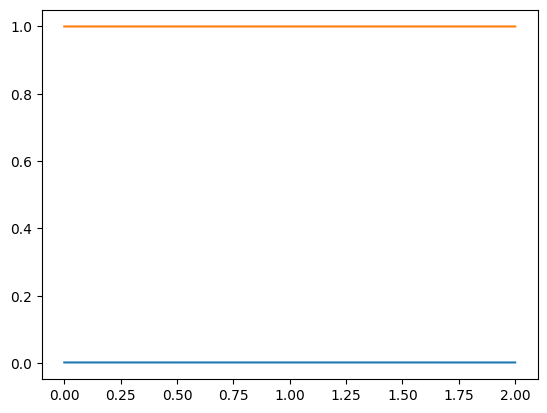

In [19]:
# loss 
plt.plot(res.history['loss'],label='loss')
plt.plot(res.history['accuracy'],label='Accuracy')

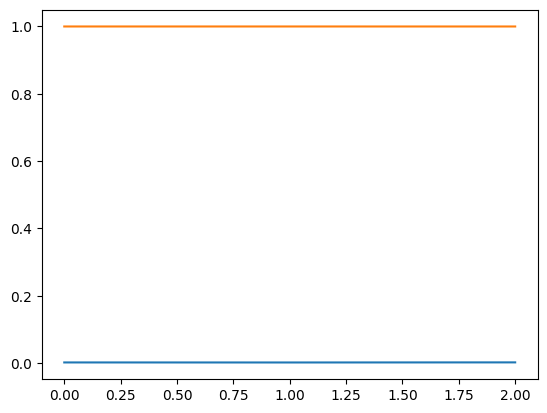

In [20]:
#Val Loss
plt.plot(res.history['val_loss'],label='val_loss')
plt.plot(res.history['val_accuracy'],label='val_Accuracy')